In [169]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import cmocean.cm as cm
import shapely.geometry
from matplotlib.patches import Polygon as MatplotlibPolygon

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Goal
Turn model results for 2019 into something that shows the spatial and temporal distributions of scrubber washwater in the Salish Sea. We were going to do 3 dyes with different half-lives, so I will probably have this notebook as the master notebook and then make two others for the different dyes.

Our parameter of interest is washwater concentration. We can use the concentrations reported in Hermansson et al. and the initial report (cite) to set contours of washwater concentration.

In [27]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = 1 - mesh.tmask[0]

In [3]:
## read in the input washwater file
ww_in = xr.open_dataset('/ocean/cdonaldson/scrubbers/yearly_obs/scrubber_1d_obs_tempsalcalc_20190101_20191231.nc')

In [2]:
## read in the year of results and select which washwater parameter to look at

In [ ]:
## depthwise sum of the whole domain, might need to do in a different notebook. save this output then read it back in

In [ ]:
## turn the whole domain into concentrations, might need to do this in a different notebook. save this output and read it back in

In [ ]:
## split into average concentration by layer slices. maybe 0-10m, 10-20m, 20-30m, 

#### Defns

In [194]:
matter_color = mcolors.to_hex(cm.matter(0.75))
haline_color = mcolors.to_hex(cm.haline(0.15))
thermal_color = mcolors.to_hex(cm.thermal(0.80))

### Plot: show the input data
Panel A: sum of all washwater volume over the domain
Panel B: histogram of individual washwater inputs
Panel C: histogram of temperature inputs
Panel D: histogram of salinity inputs

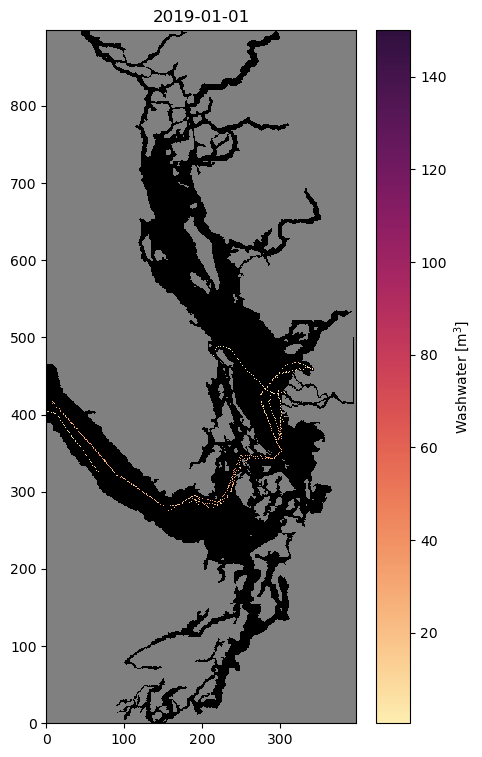

In [ ]:
fname = 'washwater_in'
writervideo = animation.FFMpegWriter(fps=10)
depth = 0 
cmap = cm.matter
cmap.set_bad('lightgray')
cmap.set_under('gray')

fig, ax = plt.subplots(1,1, figsize = (5, 9))
washwater = np.ma.masked_array(np.nan_to_num(ww_in.washwater.isel(time=0, depth=depth)), mask=tmask[0])
colours = ax.pcolormesh(washwater, cmap=cmap, vmax=150, vmin=0.5)
cb = fig.colorbar(colours, ax=ax, label=r'Washwater [m$^3$]')

def newframe(frame_num):
    washwater = np.ma.masked_array(np.nan_to_num(ww_in.washwater.isel(time=frame_num, depth=depth)), mask=tmask[depth])
    colours.set_array(washwater.ravel())
    dtime = pd.to_datetime(ww_in['time'].values[frame_num])
    ax.set_title(str(dtime.date()))

ani = FuncAnimation(fig, newframe, frames=len(ww_in['time']), repeat=False)
ani.save('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/dfo-cd/animations/{}.mp4'.format(fname), writer=writervideo)

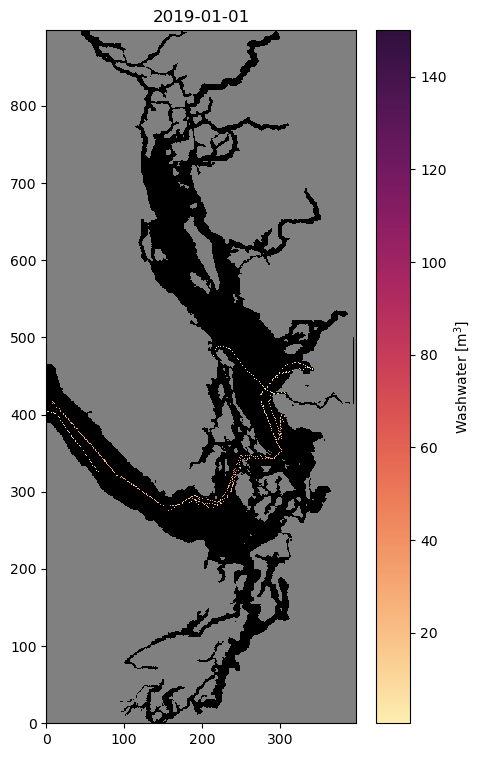

In [ ]:
fname = 'washwater_in_depth8.5'
writervideo = animation.FFMpegWriter(fps=10)
depth = 0
cmap = cm.matter
cmap.set_bad('lightgray')
cmap.set_under('gray')

fig, ax = plt.subplots(1,1, figsize = (5, 9))
washwater = np.ma.masked_array(np.nan_to_num(ww_in.washwater.isel(time=0, depth=depth)), mask=tmask[8])
colours = ax.pcolormesh(washwater, cmap=cmap, vmax=150, vmin=0.5)
cb = fig.colorbar(colours, ax=ax, label=r'Washwater [m$^3$]')

def newframe(frame_num):
    washwater = np.ma.masked_array(np.nan_to_num(ww_in.washwater.isel(time=frame_num, depth=depth)), mask=tmask[8])
    colours.set_array(washwater.ravel())
    dtime = pd.to_datetime(ww_in['time'].values[frame_num])
    ax.set_title(str(dtime.date()))

ani = FuncAnimation(fig, newframe, frames=len(ww_in['time']), repeat=False)
ani.save('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/dfo-cd/animations/{}.mp4'.format(fname), writer=writervideo)

In [14]:
ww_in_sum = ww_in.washwater.sum(dim='time')

In [133]:
washwater_flat = ww_in.washwater.values.flatten()
temp_out_flat = ww_in.temp_out.values.flatten()
sal_out_flat = ww_in.sal_out.values.flatten()

washwater_flat = washwater_flat[~np.isnan(washwater_flat)]
temp_out_flat = temp_out_flat[~np.isnan(temp_out_flat)]
sal_out_flat = sal_out_flat[~np.isnan(sal_out_flat)]

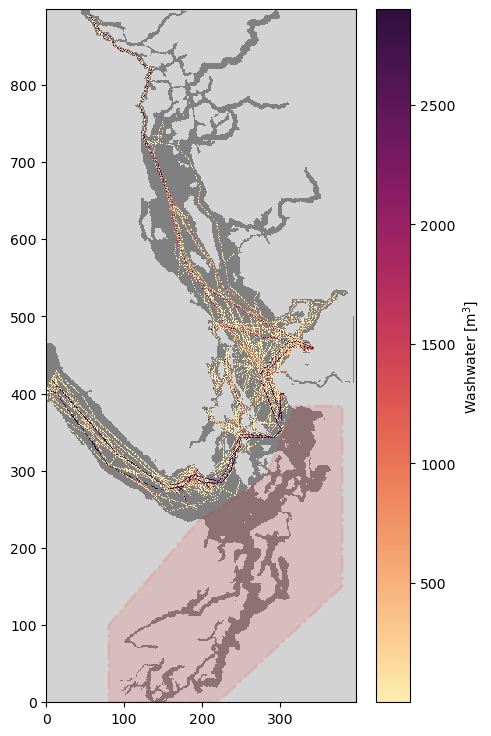

In [ ]:
# cmap = cm.matter
# cmap.set_bad('lightgray')
# cmap.set_under('gray')

# fig, ax = plt.subplots(1,1, figsize = (5, 9))
# washwater = np.ma.masked_array(np.nan_to_num(ww_in_sum.isel(depth=0)), mask=tmask[8])
# colours = ax.pcolormesh(washwater, cmap=cmap, vmax=2900, vmin=0.5)
# cb = fig.colorbar(colours, ax=ax, label=r'Washwater [m$^3$]')
# US_exclusion = shapely.geometry.Polygon([(195, 235), (280, 290), (320, 384), (380, 384), (380, 150), (220, 0), (80, 0), (80, 100)])
# patch = MatplotlibPolygon(US_exclusion.exterior.coords, closed=True, facecolor='red', alpha=0.1, edgecolor='red', linewidth=2, linestyle='-.')
# ax.add_patch(patch)

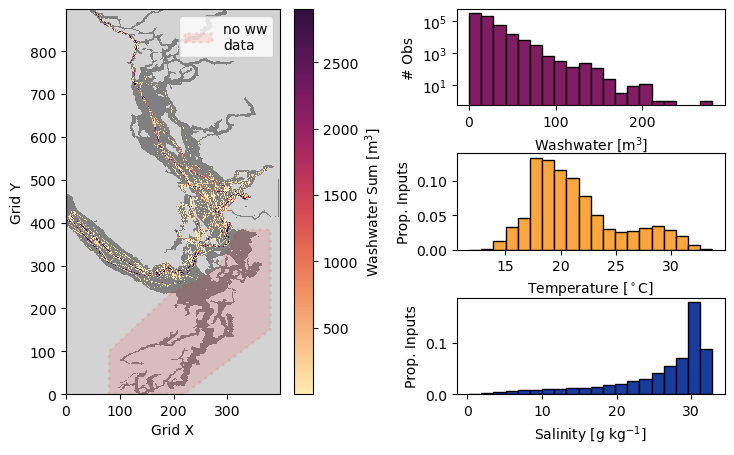

In [201]:
cmap = cm.matter
cmap.set_bad('lightgray')
cmap.set_under('gray')

fig = plt.figure(figsize = (8.5, 5))
grid = plt.GridSpec(3,4, wspace=1.7, hspace=0.5)
ax1 = plt.subplot(grid[0:,0:2])
ax2 = plt.subplot(grid[0,2:])
ax3 = plt.subplot(grid[1,2:])
ax4 = plt.subplot(grid[2,2:])

washwater = np.ma.masked_array(np.nan_to_num(ww_in_sum.isel(depth=0)), mask=tmask[8])
colours = ax1.pcolormesh(washwater, cmap=cmap, vmax=2900, vmin=0.5)
cb = fig.colorbar(colours, ax=ax1, label=r'Washwater Sum [m$^3$]')
US_exclusion = shapely.geometry.Polygon([(195, 235), (280, 290), (320, 384), (380, 384), (380, 150), (220, 0), (80, 0), (80, 100)])
patch = MatplotlibPolygon(US_exclusion.exterior.coords, closed=True, facecolor='red', alpha=0.1, edgecolor='red', linewidth=2, linestyle='dotted', label='no ww\ndata')
ax1.add_patch(patch)
ax1.set_ylabel('Grid Y')
ax1.set_xlabel('Grid X')

ax2.hist(washwater_flat, 20, density=False, log=True, color=matter_color, edgecolor='k')
ax2.set_xlabel(r'Washwater [m$^3$]')
ax2.set_ylabel('# Obs')

ax3.hist(temp_out_flat, 20, density=True, log=False, color=thermal_color, edgecolor='k')
ax3.set_xlabel(r'Temperature [$^\circ$C]')
ax3.set_ylabel('Prop. Inputs')

ax4.hist(sal_out_flat, 20, density=True, log=False, color=haline_color, edgecolor='k')
ax4.set_xlabel(r'Salinity [g kg$^{-1}$]')
ax4.set_ylabel('Prop. Inputs')

ax1.legend()

### Plot: Timeseries of volume input to the model and timeseries of total present sum in the model
This will show different responses for the different half-lives